In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [2]:
trans = transforms.ToTensor() # 将图片转为m*n*1张量
mnist_train = torchvision.datasets.FashionMNIST(
    root='../data', train=True, transform=trans, download=True
)
mnist_test = torchvision.datasets.FashionMNIST(
    root='../data', train=False, transform=trans, download=True
)

In [3]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [4]:
# 灰度图，储存每个像素点的灰度
mnist_train[0][0].shape, mnist_train[0][1]

(torch.Size([1, 28, 28]), 9)

以上可以测出读入数据的格式：每个图片以一个二元组储存，第一个分量为图片（张量格式），第二个分量为label（整数）

`Fashion-MNIST`的图片类别包括以下十种：`t-shirt`, `trousers`, `pullover`（套头毛衣）, `dress`, `coat`, `sandal`, `shirt`, `sneaker`, `bag`, `ankle boot`

In [5]:
def get_fashion_mnist_labels(labels):  #@save
    """
    Return text labels for the Fashion-MNIST dataset.
    """
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [6]:
a = np.arange(16).reshape((4, 4))
a, a.flatten(), a[0:2]

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]))

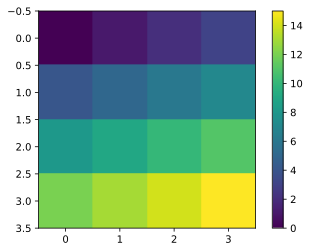

In [7]:
# 绘制一个图像，如果只输入数组，相当于热力图
plt.imshow(a)
plt.colorbar()

In [8]:
str1 = 'abc'
str1[1:3]

'bc'

In [9]:
# Pytorch张量不支持a[0:4]的方式，只能用a[i] for i in range(4)获得

Figure(144x144) AxesSubplot(0.125,0.536818;0.352273x0.343182)


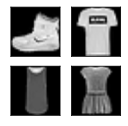

In [10]:
imgs = [mnist_train[i][0].reshape((28, 28)) for i in range(4)] # 1x28x28 的矩阵
labels = get_fashion_mnist_labels([mnist_train[i][1] for i in range(4)])
num_rows = 2; num_cols = 2
figsize = (num_rows, num_cols)
# plt.subplots 第一个参数返回完整图像，第二个参数返回每个子坐标系（数组）
figs, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
print(figs, axes[0][0])
axes = axes.flatten() # 将二维数组平坦化，变成一维数组（默认行优先）
for i, (ax, img) in enumerate(zip(axes, imgs)):
    # ax 是整个图中的一个子图
    # imshow方法可以用于绘制热力图，指定cmap='gray'产生灰度图
    ax.imshow(img.numpy(), cmap='gray')
    # 隐藏坐标轴
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    # 设置标题

In [11]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """
    Plot a list of images
    """
    figsize = (num_rows * scale, num_cols * scale)
    # plt.subplots 第一个参数返回图像，第二个参数返回坐标系（数组）
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

array([<AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'shirt'}>,
       <AxesSubplot:title={'center':'coat'}>], dtype=object)

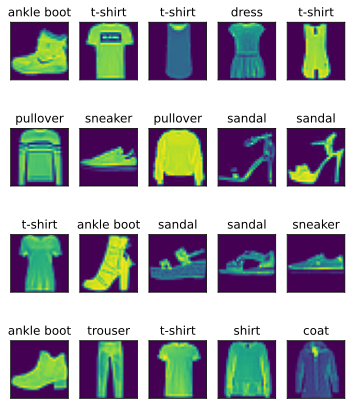

In [12]:
x, y = next(iter(data.DataLoader(mnist_train, batch_size=20)))
show_images(x.reshape(20, 28, 28), 4, 5, titles=get_fashion_mnist_labels(y))

多核读取：可以使用4个核同时读取数据

In [13]:
batch_size = 256
NUM_WORKERS = 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=NUM_WORKERS)
# train_iter_serial = data.DataLoader(mnist_train, batch_size, shuffle=True)

In [14]:
# for x, y in train_iter_serial:
#     continue

NameError: name 'train_iter_serial' is not defined

In [16]:
# 观察该cell运行时间，查看读取速度

for x, y in train_iter:
    continue

## 函数整合

以上的所有步骤将整合在下面的函数中：

In [20]:
def load_mnist_data(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root='../data', train=True, transform=trans, download=True
    )
    mnist_test = torchvision.datasets.FashionMNIST(
        root='../data', train=True, transform=trans, download=True
    )
    return (
        data.DataLoader(mnist_train, batch_size, shuffle=True),
        data.DataLoader(mnist_test, batch_size, shuffle=True)
    )

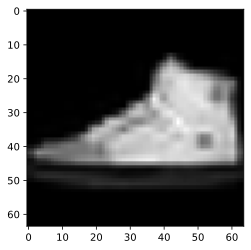

In [28]:
# resize 可以将图片继续变换大小
data_iter, test_data_iter = load_mnist_data(32, resize=64)

# iter 可将 iterable 转换成迭代器 iterator
x, y = next(iter(data_iter))
plt.imshow(x[0].reshape(64, 64), cmap='gray')